In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [148]:
warnings.filterwarnings(action='ignore')

In [149]:
x_train = pd.read_csv('./data_2018_11_27.csv').drop(['hash'], axis=1)
x_test = pd.read_csv('./data_yesun_2018_11_28.csv').drop(['hash'], axis=1)
y_train = pd.read_excel('./data/label.xlsx').sort_values(by='hash').drop(['hash'], axis=1)
y_test = pd.read_excel('./data/label_yesun.xlsx').sort_values(by='hash').drop(['hash'], axis=1)

# 랜포

In [146]:
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=28, bootstrap=True)

In [142]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 6, 1: 1},
            criterion='gini', max_depth=28, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [143]:
rf.score(x_train, y_train)

0.9999

In [144]:
rf.score(x_test, y_test)

0.9532

# 엔지니어링

In [250]:
etc_train = pd.read_csv('./data/result_hak/feature_asm_etc_info.csv').fillna(0)

In [248]:
x_data = pd.concat([x_train, y_train, etc_train], axis = 1)

In [249]:
x_data[['SizeOfCode', 'SizeOfHeaders', 'SizeOfOptionalHeader', 'TotalSizePE', 'SizeOfImage', 'SectionSizeSum', 'bin_size', 'number_of_lines']]

,SizeOfCode,SizeOfHeaders,SizeOfOptionalHeader,TotalSizePE,SizeOfImage,SectionSizeSum,bin_size,number_of_lines
0,24576.0,4096.0,224.0,36868.0,49152.0,4.0,36868.0,1.0
1,25088.0,1024.0,224.0,503628.0,425984.0,380928.0,503628.0,9129.0
2,233472.0,4096.0,224.0,261180.0,278528.0,258048.0,261180.0,50231.0
3,20480.0,4096.0,224.0,32116.0,208896.0,200704.0,32116.0,221.0
4,0.0,0.0,0.0,0.0,0.0,0.0,96340.0,17408.0
5,0.0,0.0,0.0,0.0,0.0,0.0,40964.0,1556.0
6,43008.0,1024.0,224.0,96340.0,106496.0,81920.0,19822.0,1255.0
7,8192.0,4096.0,224.0,40964.0,40960.0,36864.0,1055748.0,632.0
8,3072.0,1024.0,224.0,19822.0,24576.0,12288.0,1411076.0,331686.0
9,833536.0,512.0,224.0,1055748.0,1073152.0,2427.0,237572.0,31491.0


In [275]:
(x_data['TotalSizePE'] / 1024 / 1024)

0       0.035160
1       0.480297
2       0.249081
3       0.030628
4       0.000000
5       0.000000
6       0.091877
7       0.039066
8       0.018904
9       1.006840
10      1.345707
11      0.226566
12      0.135748
13      0.302761
14      0.445805
15      0.039068
16      0.238782
17      0.195225
18      1.749516
19      0.438969
20      0.399318
21      0.049320
22      0.192806
23      0.591801
24      0.005863
25      0.116581
26      0.835969
27      1.307133
28      0.826326
29      0.018253
          ...   
9970    0.062313
9971    1.673988
9972    0.619618
9973    0.608891
9974    0.114750
9975    0.802911
9976    1.115645
9977    1.627865
9978    0.461354
9979    0.141529
9980    0.319538
9981    0.296399
9982    1.538166
9983    0.238782
9984    0.006351
9985    0.045803
9986    1.062504
9987    1.013187
9988    0.108402
9989    1.313461
9990    0.319569
9991    0.262086
9992    0.027330
9993    0.015141
9994    0.465336
9995    0.468754
9996    0.090336
9997    0.6367

In [227]:
pd.crosstab(x_data[x_data.SizeOfCode < x_data.TotalSizePE].is_mal, 'cnt')

col_0,cnt
is_mal,
0,2981
1,6821


In [252]:
feature_name = 'TotalSizePE'

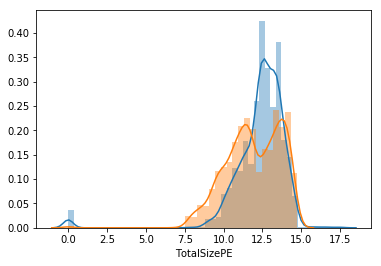

In [253]:
sns.distplot(np.log(x_data[feature_name][x_data.is_mal == 1] + 1 ))
sns.distplot(np.log(x_data[feature_name][x_data.is_mal == 0] + 1 ))

In [254]:
pd.crosstab(x_data[feature_name][x_data.is_mal == 1], 'cnt').sort_values(by='cnt', ascending=False)

col_0,cnt
TotalSizePE,
0.0,90
674308.0,69
94724.0,68
250381.0,41
673796.0,30
446468.0,29
247309.0,27
97796.0,27
237572.0,26


In [255]:
pd.crosstab(x_data[feature_name][x_data.is_mal == 0], 'cnt').sort_values(by='cnt', ascending=False)

col_0,cnt
TotalSizePE,
2564.0,25
1038590.0,21
6148.0,17
775676.0,16
1043366.0,15
12804.0,13
5124.0,13
4100.0,12
3076.0,11


# 비교분석

In [377]:
x_train_t = copy.copy(x_train)
x_test_t = copy.copy(x_test)

In [371]:
x_train_t.head(1)

,AddressOfEntryPoint,Characteristics,CheckSum,DebugSize,ExportSize,FileAlignment,GeneratedCheckSum,IatRva,ImageBase,Machine,...,shell32,shlwapi,urlmon,user32,wininet,ws2_32,wsock32,db_y,dd_y,dw_y
0,30542.0,8450.0,60881.0,0.0,0.0,4096.0,96371.0,30464.0,4194304.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### export size / total size pe
- 0.9533 => 0.9532

In [369]:
x_train_t.ExportSize = x_train_t.ExportSize / (x_train_t.TotalSizePE + 1)
x_test_t.ExportSize = x_test_t.ExportSize / (x_test_t.TotalSizePE + 1)

###### Generated Check Sum의 로그의 12.5로부터의 거리
- 0.9533 => 0.9524

In [297]:
x_train_t['GeneratedCheckSum_new'] = abs(12.5 - np.log(x_train_t.GeneratedCheckSum + 1))
x_test_t['GeneratedCheckSum_new'] = abs(12.5 - np.log(x_test_t.GeneratedCheckSum + 1))

###### TotalSizePE 바이트 => 메가바이트

In [342]:
x_train_t['TotalSizePE'] = x_train_t['TotalSizePE'] / (1024 * 1024)
x_test_t['TotalSizePE'] = x_test_t['TotalSizePE'] / (1024 * 1024)

###### 각 합의 비율

In [372]:
x_train_t['sum_reg'] = 0
x_test_t['sum_reg'] = 0

for col in x_train_t.loc[:, "db_y":].columns:
    x_train_t['sum_reg'] += x_train_t[col]
    x_test_t['sum_reg'] += x_test_t[col]

In [373]:
for col in x_train_t.loc[:, "db_y":].columns:
    x_train_t[col] = x_train_t[col] / (x_train_t['sum_reg'] + 1)
    x_test_t[col] = x_test_t[col] / (x_test_t['sum_reg'] + 1)

In [374]:
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1, max_depth=28)

In [378]:
rf.fit(x_train_t, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=28, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [379]:
rf.score(x_test_t, y_test)

0.9534

##### asm 이미지 1000바이트

In [179]:
x_train_asm = pd.read_csv('./asm_img_train.csv')[['asm_img_' + str(v + 1) for v in range(100)] + ['Unnamed: 0']]
x_test_asm = pd.read_csv('./asm_img_ye.csv')[['asm_img_' + str(v + 1) for v in range(100)] + ['Unnamed: 0']]

In [18]:
x_train = pd.merge(x_train, x_train_asm, left_on='hash', right_on='hash', how='left').fillna(0).drop(['hash'],axis=1)
x_test = pd.merge(x_test, x_test_asm, left_on='hash', right_on='Unnamed: 0', how='left').fillna(0).drop(['hash', 'Unnamed: 0'],axis=1)

NameError: name 'x_train_asm' is not defined